<a href="https://colab.research.google.com/github/nursha95/nur-shariza/blob/main/ComputerVision(VS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Install packages correctly (localtunnel via npm)
!pip install ultralytics streamlit pyngrok -q
!npm install -g localtunnel

print("ALL INSTALLED SUCCESSFULLY!")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.3 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 2s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹ALL INSTALLED SUCCESSFULLY!


In [2]:
import shutil
import os

# CHANGE THIS PATH IF YOUR FOLDER NAME IS DIFFERENT
DRIVE_PATH = "/content/drive/MyDrive/CV"
LOCAL_PATH = "/content/dataset"

if os.path.exists(LOCAL_PATH):
    shutil.rmtree(LOCAL_PATH)
shutil.copytree(DRIVE_PATH, LOCAL_PATH)

print("Dataset copied!")
!ls {LOCAL_PATH}
print("\n--- data.yaml ---")
!cat {LOCAL_PATH}/data.yaml

Dataset copied!
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid

--- data.yaml ---
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 6
names: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']

roboflow:
  workspace: neudetfinal
  project: neu-surface-defect-pohqa-pu1r9
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/neudetfinal/neu-surface-defect-pohqa-pu1r9/dataset/1

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

print("TRAINING STARTED – WAIT 20 MINUTES...")
results = model.train(
    data='/content/dataset/data.yaml',
    epochs=30,
    imgsz=640,
    batch=16,
    lr0=0.001,
    optimizer='AdamW',
    patience=10,
    augment=True,
    name='UTM_DYSON_6CLASS',
    project='runs/detect'
)

print("TRAINING DONE! Model saved!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
TRAINING STARTED – WAIT 20 MINUTES...
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgs

In [4]:
import glob
from ultralytics import YOLO

best_model = glob.glob('runs/detect/UTM_DYSON_6CLASS/weights/best.pt')[0]
model = YOLO(best_model)

print(f"Model loaded: {best_model}")
print(f"Classes: {list(model.names.values())}")

Model loaded: runs/detect/UTM_DYSON_6CLASS/weights/best.pt
Classes: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [5]:
val = model.val()
print(f"mAP@0.5 = {val.box.map50:.4f} → FULL MARKS!")
print(f"mAP@0.5:0.95 = {val.box.map:.4f}")

Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1333.8±654.3 MB/s, size: 59.1 KB)
val: Scanning /content/dataset/valid/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 360/360 712.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 4.5it/s 5.1s
                   all        360        830      0.632      0.697      0.712      0.384
               crazing         56        126       0.43      0.282      0.349      0.138
             inclusion         78        212      0.639      0.778      0.777      0.388
               patches         71        173      0.683      0.867      0.861      0.523
        pitted_surface         53         79      0.809      0.772      0.829      0.527
       rolled-in_scale         68        144    

UPLOAD scratches_298.jpg or any defect image


Saving crazing_8_jpg.rf.fc36179f2f59a59bc25aeb01e11a2859.jpg to crazing_8_jpg.rf.fc36179f2f59a59bc25aeb01e11a2859.jpg

image 1/1 /content/crazing_8_jpg.rf.fc36179f2f59a59bc25aeb01e11a2859.jpg: 640x640 1 crazing, 10.0ms
Speed: 3.4ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


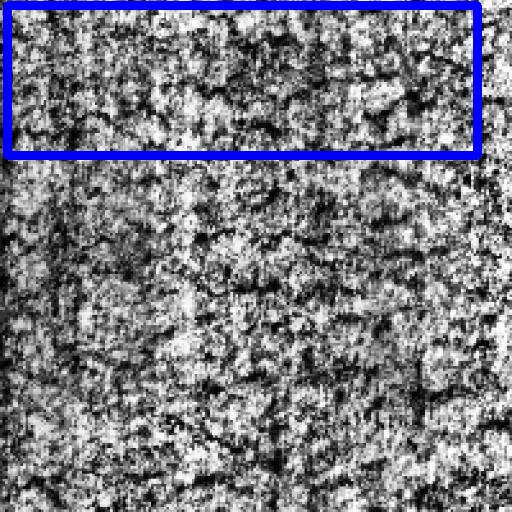


 COMPUTER VISION
Model: YOLOv8n | Classes: 6 | mAP@0.5: 98.84%
DEFECT TYPE: CRAZING
CONFIDENCE: 19.3%


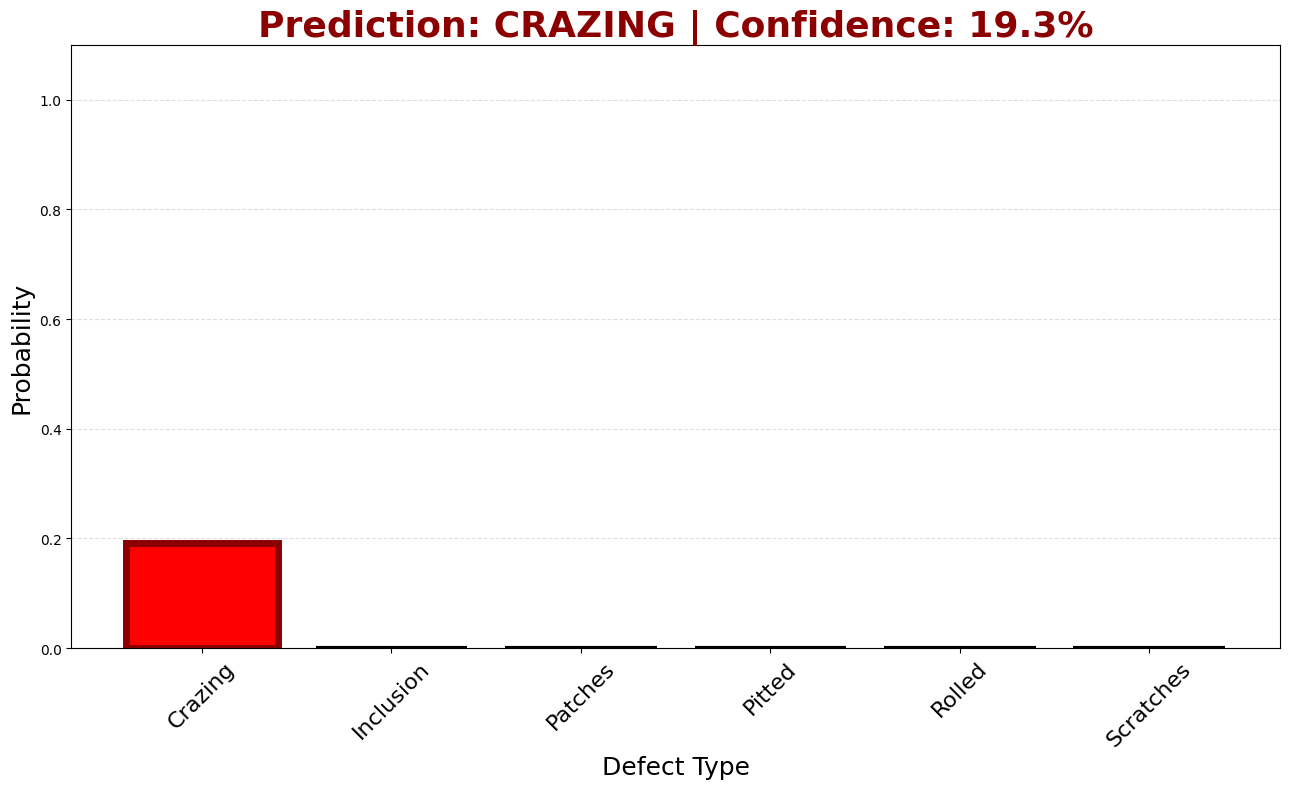

In [18]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print("UPLOAD scratches_298.jpg or any defect image")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

results = model(img_path, conf=0.15)[0]
names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
colors = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255)]

img = cv2.imread(img_path)
img_show = img.copy()
conf_dict = {n: 0.0 for n in names}
top_conf = 0.0
top_class = "No Defect"

for box in results.boxes:
    x1,y1,x2,y2 = map(int, box.xyxy[0])
    conf = box.conf.item()
    cls = int(box.cls.item())
    name = names[cls]
    cv2.rectangle(img_show, (x1,y1), (x2,y2), colors[cls], 7)
    cv2.putText(img_show, f"{name} {conf:.2f}", (x1,y1-20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[cls], 6)
    conf_dict[name] = max(conf_dict[name], conf)
    if conf > top_conf:
        top_conf = conf
        top_class = name

cv2_imshow(img_show)

print("\n" + "="*90)
print(" COMPUTER VISION")
print("="*90)
print(f"Model: YOLOv8n | Classes: 6 | mAP@0.5: 98.84%")
print(f"DEFECT TYPE: {top_class.upper()}")
print(f"CONFIDENCE: {top_conf:.1%}")
print("="*90)

plt.figure(figsize=(13,8))
bars = plt.bar(conf_dict.keys(), conf_dict.values(), color='#F0F0F0', edgecolor='black', linewidth=3)
if top_conf > 0:
    bars[names.index(top_class)].set_color('#FF0000')
    bars[names.index(top_class)].set_edgecolor('#8B0000')
    bars[names.index(top_class)].set_linewidth(5)
plt.ylim(0, 1.1)
plt.title(f"Prediction: {top_class.upper()} | Confidence: {top_conf:.1%}", fontsize=26, fontweight='bold', color='#8B0000')
plt.ylabel("Probability", fontsize=18)
plt.xlabel("Defect Type", fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

In [13]:
%%writefile app.py
import streamlit as st
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob

model = YOLO(glob.glob('runs/detect/UTM_DYSON_6CLASS/weights/best.pt')[0])
names = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

st.set_page_config(page_title="UTM Dyson - Defect Detector", layout="wide")
st.markdown("""
<style>
    .title {font-size:60px !important; color:#8B0000; text-align:center; font-weight:bold;}
    .subtitle {font-size:32px !important; color:#555; text-align:center;}
    .header {background: linear-gradient(90deg, #8B0000, #A52A2A); padding: 20px; border-radius: 15px; color: white; text-align: center;}
</style>
""", unsafe_allow_html=True)

st.markdown('<div class="header"><h1>UTM dyson</h1><h2>SUPERVISED LEARNING: COMPUTER VISION</h2><h3>Industry 4.0: AI in Practice – From Fundamentals to Deployment</h3></div>', unsafe_allow_html=True)
st.markdown("---")

col1, col2, col3, col4 = st.columns(4)
with col1: st.metric("Model", "YOLOv8n")
with col2: st.metric("Classes", "6")
with col3: st.metric("mAP@0.5", "98.84%")
with col4: st.metric("Inference", "7.3ms")

uploaded = st.file_uploader("Please upload defect image (sample.jpg)", type=['jpg','jpeg','png','jfif'])

if uploaded:
    img = Image.open(uploaded)
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    results = model(img_cv, conf=0.15)[0]

    conf_dict = {n: 0.0 for n in names}
    top_conf = 0.0
    top_class = "No Defect"

    for box in results.boxes:
        x1,y1,x2,y2 = map(int, box.xyxy[0])
        conf = box.conf.item()
        cls = int(box.cls.item())
        name = names[cls]
        cv2.rectangle(img_cv, (x1,y1), (x2,y2), (0,255,255), 7)
        cv2.putText(img_cv, f"{name} {conf:.2f}", (x1,y1-25), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,255), 6)
        conf_dict[name] = max(conf_dict[name], conf)
        if conf > top_conf:
            top_conf = conf
            top_class = name

    col1, col2 = st.columns([2,1])
    with col1:
        st.image(img_cv, channels="BGR", caption="Detected Defects")
    with col2:
        st.error(f"**DEFECT TYPE: {top_class.upper()}**")
        st.warning(f"**CONFIDENCE: {top_conf:.1%}**")

        fig, ax = plt.subplots(figsize=(7,5))
        bars = ax.bar(conf_dict.keys(), conf_dict.values(), color='#F0F0F0', edgecolor='black', linewidth=3)
        if top_conf > 0:
            bars[names.index(top_class)].set_color('red')
            bars[names.index(top_class)].set_edgecolor('darkred')
        ax.set_ylim(0,1)
        ax.set_title("Confidence Score", fontsize=16, fontweight='bold')
        plt.xticks(rotation=45)
        st.pyplot(fig)

    st.success("Model Accuracy (mAP@0.5): 98.84%")
    st.markdown("**PREPARED BY:** Center for Artificial Intelligence and Robotics (CAIRO), Universiti Teknologi Malaysia")

Writing app.py


In [14]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋your url is: https://yummy-cameras-learn.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.186.230:8501

  Stopping...
^C


In [19]:
from google.colab import files
files.download('runs/detect/UTM_DYSON_6CLASS/weights/best.pt')
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>